# Binary Classification with a Bank Churn Dataset

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import metrics


In [87]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_submittion = pd.read_csv('sample_submission.csv')

In [88]:
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [89]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [90]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,165034.0,8.251650e+04,47641.356500,0.00,41258.25,82516.5,1.237748e+05,165033.00
CustomerId,165034.0,1.569201e+07,71397.816791,15565701.00,15633141.00,15690169.0,1.575682e+07,15815690.00
CreditScore,165034.0,6.564544e+02,80.103340,350.00,597.00,659.0,7.100000e+02,850.00
Age,165034.0,3.812589e+01,8.867205,18.00,32.00,37.0,4.200000e+01,92.00
Tenure,165034.0,5.020353e+00,2.806159,0.00,3.00,5.0,7.000000e+00,10.00
Balance,165034.0,5.547809e+04,62817.663278,0.00,0.00,0.0,1.199395e+05,250898.09
NumOfProducts,165034.0,1.554455e+00,0.547154,1.00,1.00,2.0,2.000000e+00,4.00
HasCrCard,165034.0,7.539537e-01,0.430707,0.00,1.00,1.0,1.000000e+00,1.00
IsActiveMember,165034.0,4.977702e-01,0.499997,0.00,0.00,0.0,1.000000e+00,1.00
EstimatedSalary,165034.0,1.125748e+05,50292.865585,11.58,74637.57,117948.0,1.551525e+05,199992.48


In [91]:
scaler = StandardScaler()
df_train[['Balance', 'EstimatedSalary']] = scaler.fit_transform(df_train[['Balance', 'EstimatedSalary']])


In [92]:
cat_cols = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited']

num_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# find the value counts of the categorical columns
for col in cat_cols:
    print(df_train[col].value_counts())
    print()


Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64

Gender
Male      93150
Female    71884
Name: count, dtype: int64

Tenure
2     18045
7     17810
4     17554
8     17520
5     17268
1     16760
9     16709
3     16630
6     15822
10     5909
0      5007
Name: count, dtype: int64

NumOfProducts
2    84291
1    77374
3     2894
4      475
Name: count, dtype: int64

HasCrCard
1.0    124428
0.0     40606
Name: count, dtype: int64

IsActiveMember
0.0    82885
1.0    82149
Name: count, dtype: int64

Exited
0    130113
1     34921
Name: count, dtype: int64



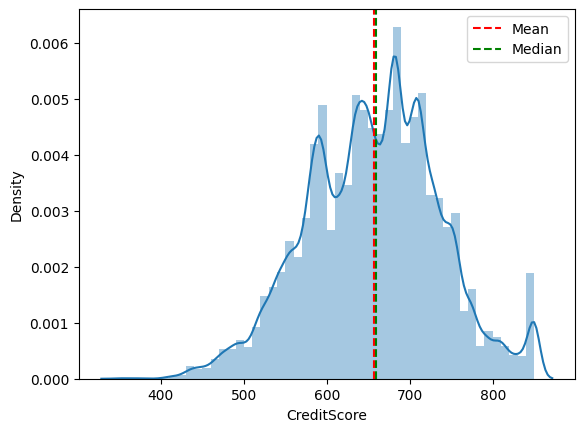

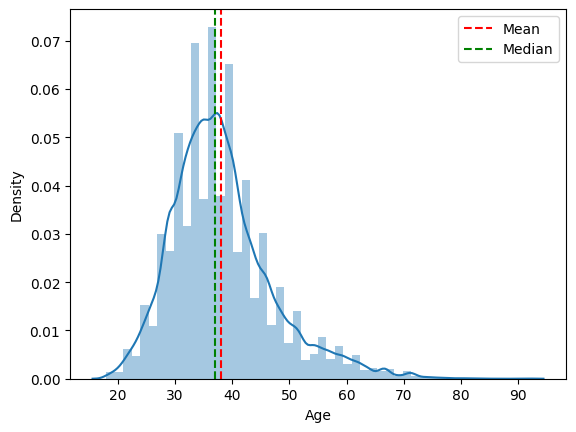

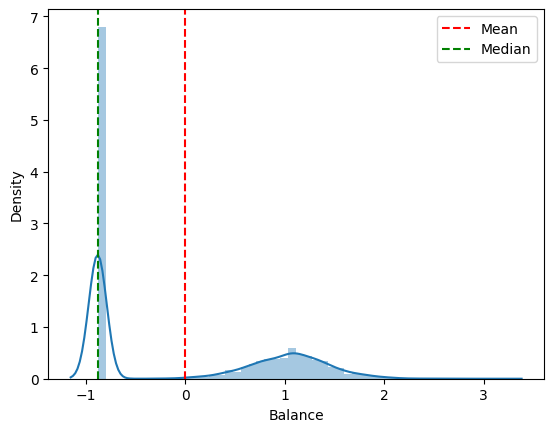

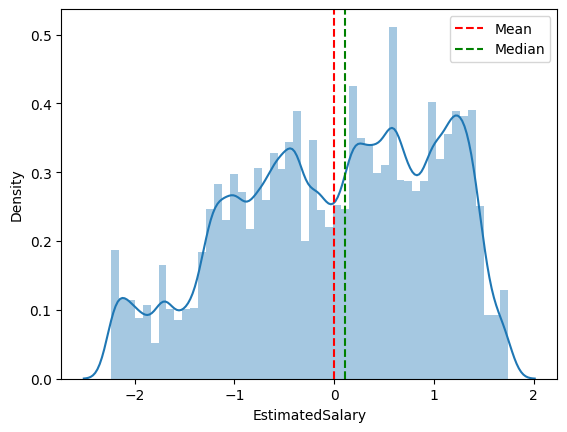

In [93]:
# create histogram of numerical columns using sns and kde=true
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
for col in num_cols:
    sns.distplot(df_train[col], kde=True)
    plt.axvline(df_train[col].mean(), color='r', linestyle='--', label='Mean')
    plt.axvline(df_train[col].median(), color='g', linestyle='--', label='Median')
    plt.legend()
    plt.show()

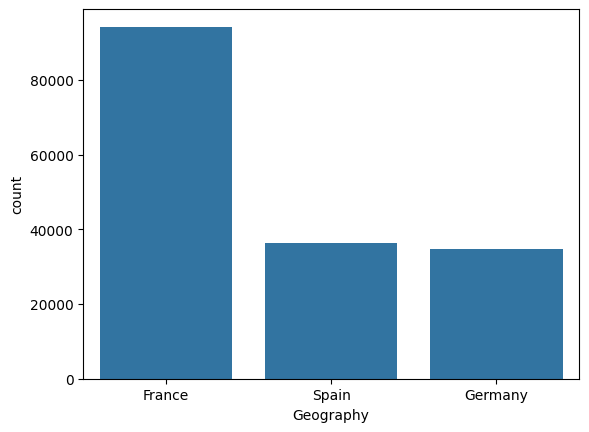

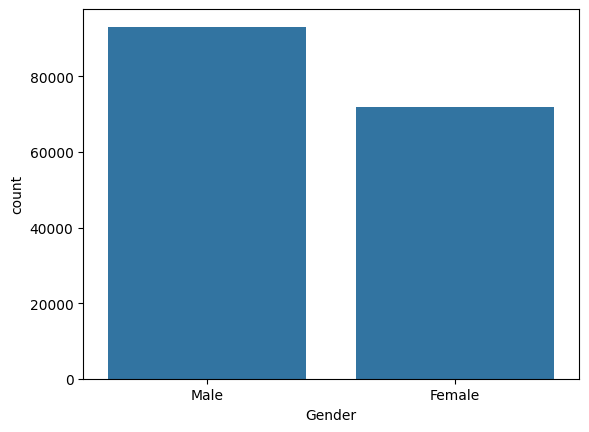

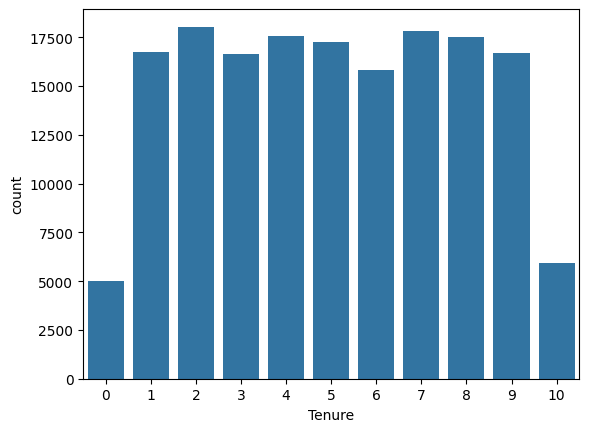

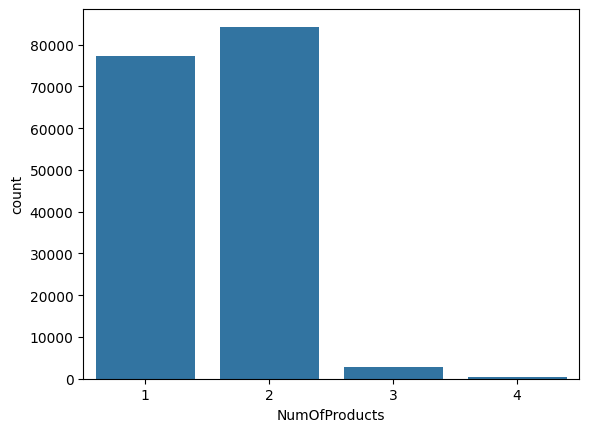

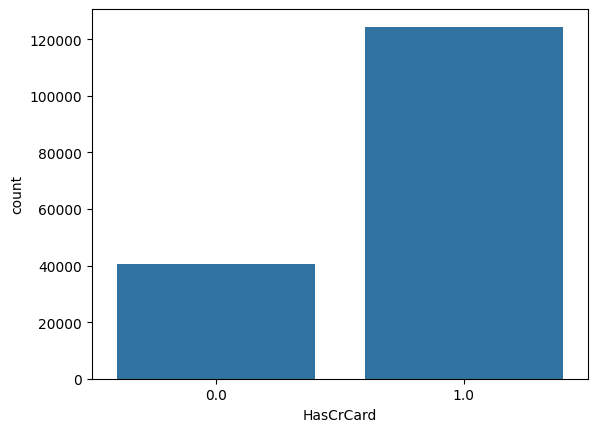

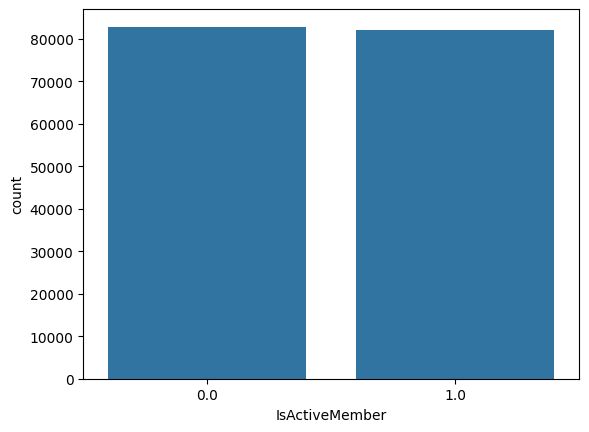

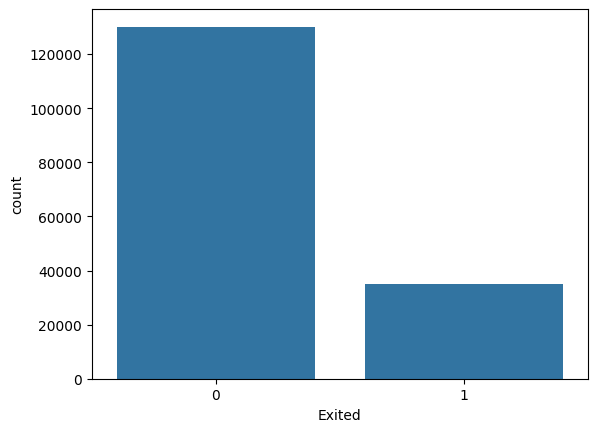

In [94]:
# create a count plot for each cat column
for col in cat_cols:
    sns.countplot(df_train , x = df_train[col])
    plt.show()

In [95]:
# print the number of rows and columns
print(f"The train dataset has {df_train.shape[0]} rows and {df_train.shape[1]} columns")

The train dataset has 165034 rows and 14 columns


In [96]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [97]:
le = LabelEncoder()
df_train['Geography'] = le.fit_transform(df_train['Geography'])
df_train['Gender'] = le.fit_transform(df_train['Gender'])

In [98]:
df_train.head(5)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,0,1,33.0,3,-0.883163,2,1.0,0.0,1.369486,0
1,1,15749177,Okwudiliolisa,627,0,1,33.0,1,-0.883163,2,1.0,1.0,-1.254085,0
2,2,15694510,Hsueh,678,0,1,40.0,10,-0.883163,2,1.0,0.0,1.437422,0
3,3,15741417,Kao,581,0,1,34.0,2,1.486918,1,1.0,1.0,-0.557018,0
4,4,15766172,Chiemenam,716,2,1,33.0,5,-0.883163,2,1.0,1.0,-1.938770,0


In [99]:
df_train['Geography'].value_counts()

Geography
0    94215
2    36213
1    34606
Name: count, dtype: int64

In [100]:
# split the data into X and y
x = df_train.drop(['Exited', 'id', 'CustomerId', 'Surname'] , axis=1)
y = df_train['Exited']

In [101]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,668,0,1,33.0,3,-0.883163,2,1.0,0.0,1.369486
1,627,0,1,33.0,1,-0.883163,2,1.0,1.0,-1.254085
2,678,0,1,40.0,10,-0.883163,2,1.0,0.0,1.437422
3,581,0,1,34.0,2,1.486918,1,1.0,1.0,-0.557018
4,716,2,1,33.0,5,-0.883163,2,1.0,1.0,-1.938770


# Building the model for the prediction

Accuracy: 0.8627866816129912
Precision: 0.7372865453180709
Recall: 0.556673278549164
F1: 0.6343747477193832


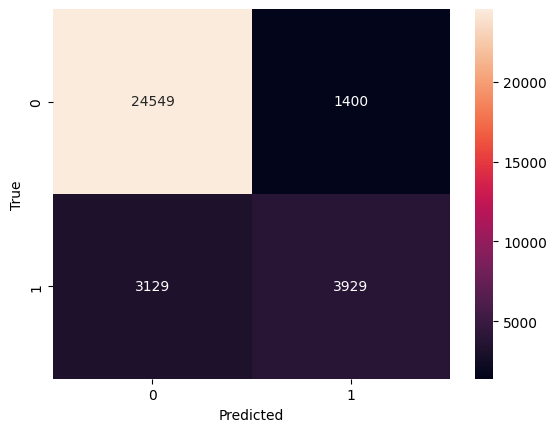

In [115]:
# train test split the data
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 )

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = XGBClassifier().fit(X_train,y_train)


y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1: {f1_score(y_test, y_pred)}")

# plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()




Epoch 1/5
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.7962 - loss: 0.4828 - val_accuracy: 0.7942 - val_loss: 0.4682
Epoch 2/5
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8049 - loss: 0.4294 - val_accuracy: 0.8029 - val_loss: 0.4276
Epoch 3/5
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8150 - loss: 0.4201 - val_accuracy: 0.7852 - val_loss: 0.4602
Epoch 4/5
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8163 - loss: 0.4215 - val_accuracy: 0.8100 - val_loss: 0.4312
Epoch 5/5
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.8205 - loss: 0.4157 - val_accuracy: 0.8119 - val_loss: 0.4418
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8106 - loss: 0.4472
the loss of the test model:  0.4418087303638458
the accuracy of the test model:  0.8119489550590515


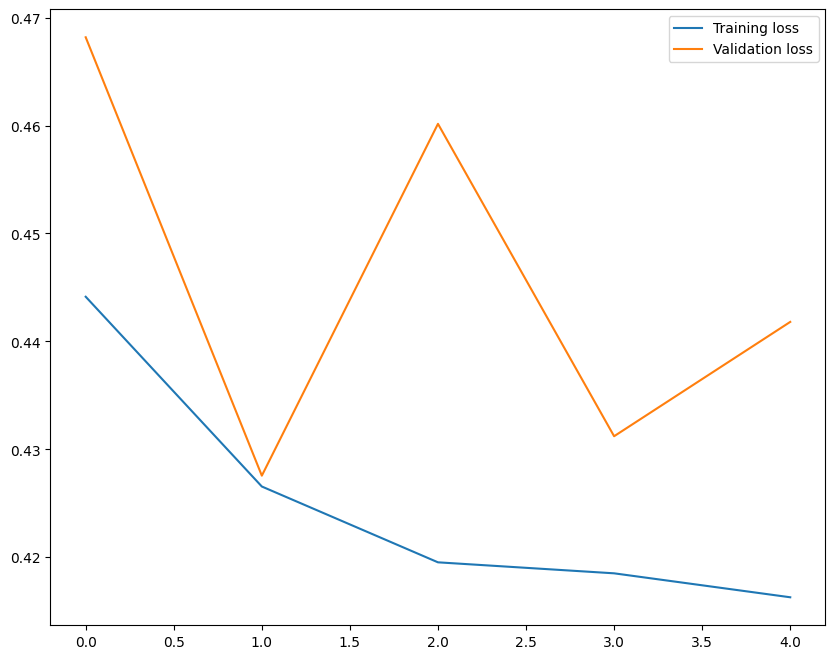

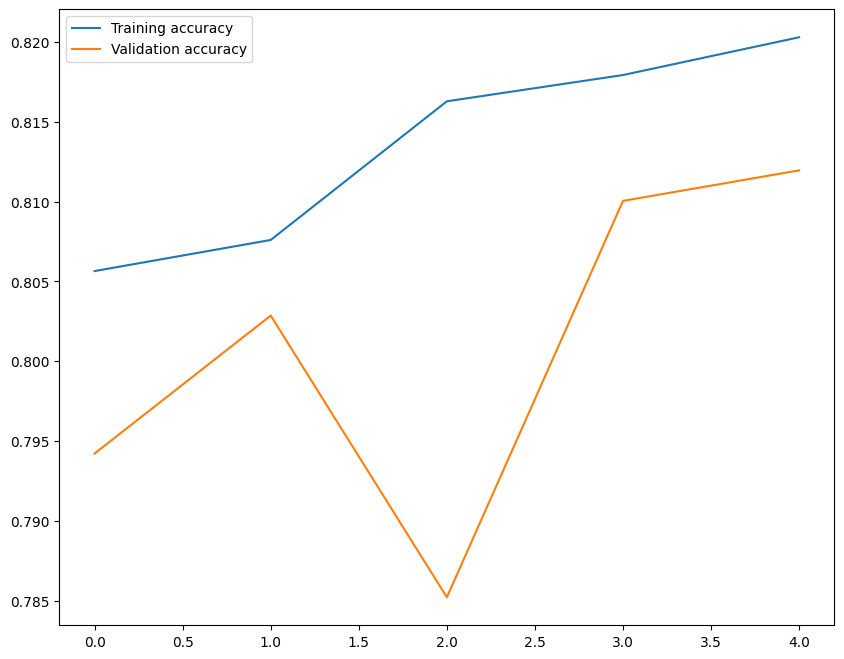

In [121]:
from tensorflow.keras.callbacks import EarlyStopping
NN = tf.keras.models.Sequential()

NN.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
NN.add(tf.keras.layers.Dense(16, activation='relu'))
NN.add(tf.keras.layers.Dense(32, activation='relu'))
NN.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Define the callback function
early_stopping = EarlyStopping(patience=10)

NN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = NN.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

y_pred = NN.predict(X_test)

loss, mae = NN.evaluate(X_test, y_test, verbose=1)
print("the loss of the test model: ",loss)
print("the accuracy of the test model: ",mae)

# plot the training and testing loss and accuracy at each epoch
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(history.history['loss'], label='Training loss')
ax.plot(history.history['val_loss'], label='Validation loss')
ax.legend()
plt.show()

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(history.history['accuracy'], label='Training accuracy')
ax.plot(history.history['val_accuracy'], label='Validation accuracy')
ax.legend()
plt.show()



In [127]:

y_pred = NN.predict(df_test.drop(['id', 'CustomerId', 'Surname'], axis=1))


df_submittion['Exited'] = y_pred
df_submittion.to_csv('myfile_of_submission_by_NN.csv', index=False)


3439/3439 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


In [114]:
df_test['Geography'] = le.fit_transform(df_test['Geography'])
df_test['Gender'] = le.fit_transform(df_test['Gender'])

# predict the test data and create a submission file of probability of each class
y_pred = model.predict_proba(df_test.drop(['id', 'CustomerId', 'Surname'], axis=1))

df_submittion['Exited'] = y_pred[:, 1]
df_submittion.to_csv('myfile of submission.csv', index=False)